# Création et classification de consommateur important

## Contexte

Le client peut avoir besoin de classer les consommateur qui font vivre le site
et qui dépense régulièrement sur le site afin de les mettre à l'honneur.

## Hypothèse

Un client peut être considérer important s'il dépense une quantité importante sur le site.
Mais aussi s'il fait une review sur les articles achetés.

## Visualisation des données

In [2]:
import pandas as pd
import yaml
import seaborn as sns
import matplotlib.pyplot as plt

with open('../params/configs/data_path.yaml', 'r') as fp:
    data_path = yaml.load(fp)
df_customers = pd.read_csv(data_path['olist_customers_dataset'])
df_reviews = pd.read_csv(data_path['olist_order_reviews_dataset'])
df_payments = pd.read_csv(data_path['olist_order_payments_dataset'])
df_orders = pd.read_csv(data_path['olist_orders_dataset'])
df = pd.merge(df_customers, df_orders, on='customer_id')
df = pd.merge(df, df_payments, on='order_id')
df = pd.merge(df, df_reviews, on='order_id')
df['Total'] = df.groupby(['customer_id'])['payment_value'].transform('sum')

C:\Users\Verner\miniconda3\envs\tp\lib\site-packages\ipykernel_launcher.py:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  import sys


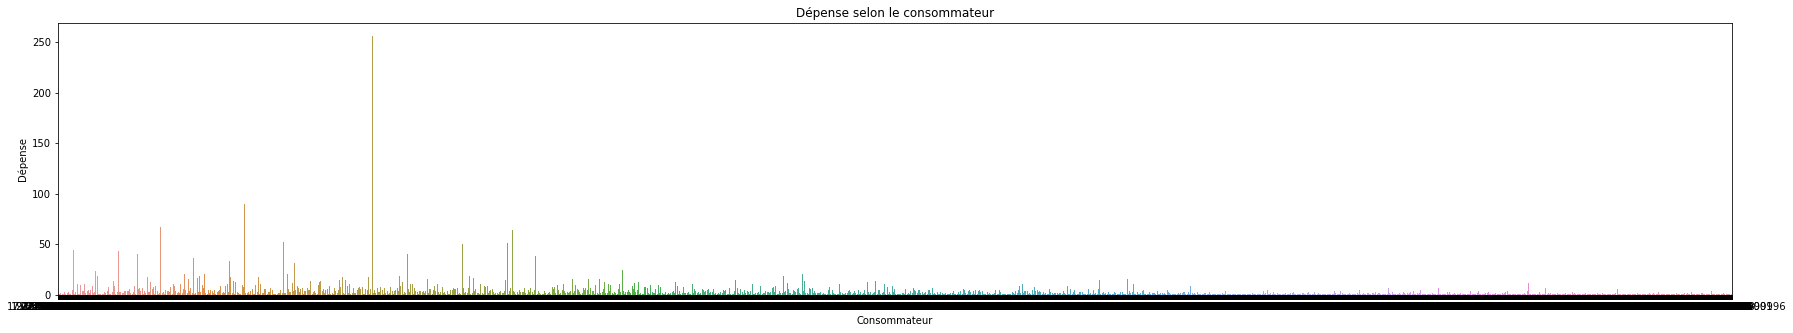

In [3]:
plt.figure(figsize=(30,5))
sns.countplot(data=df, x='Total')
plt.ylabel("Dépense")
plt.xlabel("Consommateur")
plt.title("Dépense selon le consommateur")
plt.savefig('../params/plot/important_customer/depense_costumer.png')
plt.show()

<AxesSubplot:title={'center':'Taux de message de commentaire'}>

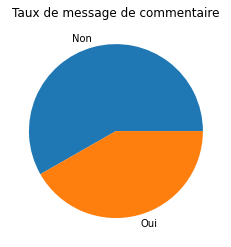

In [4]:
df['review_comment_message'].isna().value_counts().plot.pie(title="Taux de message de commentaire", label="", labels=['Non', 'Oui'])

<AxesSubplot:title={'center':'Taux de message de commentaire de consommateur dépensant plus de 25'}>

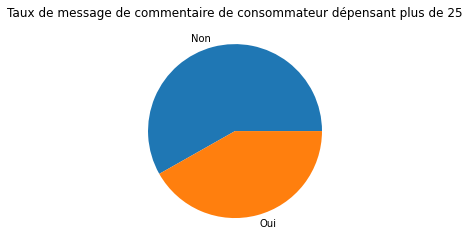

In [5]:
df_tmp = df[df['Total'] > 25]
df_tmp['review_comment_message'].isna().value_counts().plot.pie(title="Taux de message de commentaire de consommateur dépensant plus de 25", label="", labels=['Non', 'Oui'])

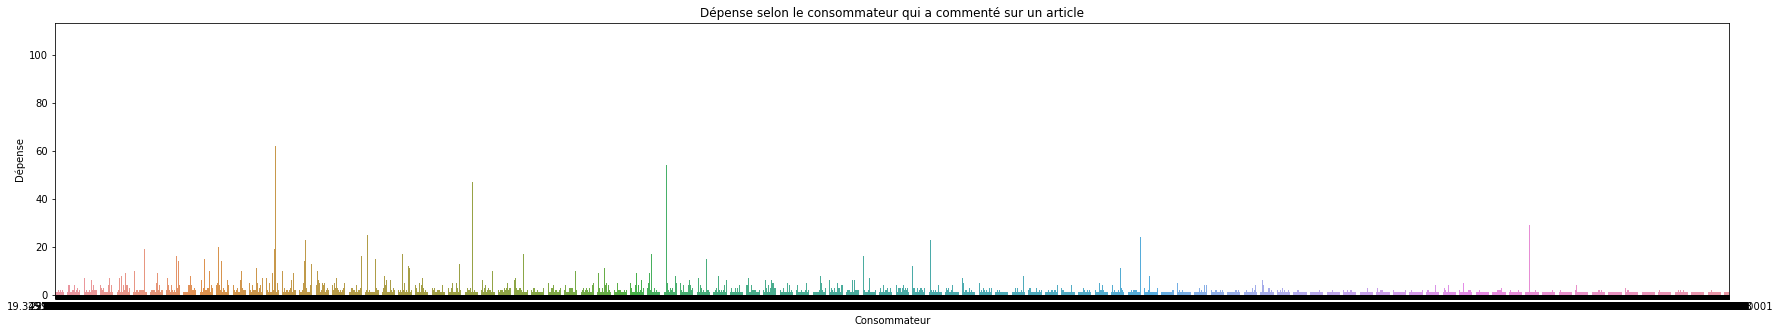

In [6]:
df_tmp = df[df['review_comment_message'].isna() == False]
plt.figure(figsize=(30,5))
sns.countplot(data=df_tmp, x='Total')
plt.ylabel("Dépense")
plt.xlabel("Consommateur")
plt.title("Dépense selon le consommateur qui a commenté sur un article")
plt.savefig('../params/plot/important_customer/depense_costumer_review.png')
plt.show()

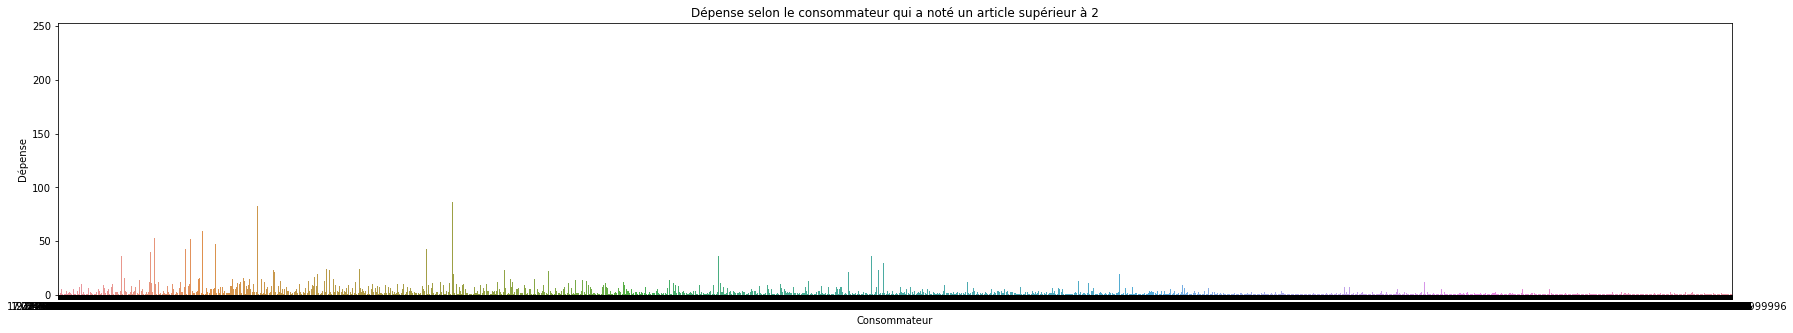

In [7]:
df_tmp = df[df['review_score'] > 2]
plt.figure(figsize=(30,5))
sns.countplot(data=df_tmp, x='Total')
plt.ylabel("Dépense")
plt.xlabel("Consommateur")
plt.title("Dépense selon le consommateur qui a noté un article supérieur à 2")
plt.savefig('../params/plot/important_customer/depense_costumer_rand_greater2.png')
plt.show()

## Conclusion

Le fait que le consommateur mette un commentaire sur un article n'a pas l'air d'avoir d'indice sur la somme qu'il consomme.
Il faut définir avec le client ce que sont des consommateurs importants.